In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

In [2]:
updated_train_path= r"C:\\Users\modis\OneDrive\Documents\pattern recognitio\CECS550Project\Dataset\updated_train.csv"
df = pd.read_csv(updated_train_path)

In [3]:
df

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,unique_categories,unique_merchants,unique_brands,...,add_to_favorites,days_since_last_interaction,days_since_first_interaction,day_of_week,0,1,2,3,age_range_to_gender_interaction_count,label
0,219316,472,737,801,5890.0,1018,0,1,1,1,...,0,24,24,3,1,0,0,0,1,0.0
1,69247,471,1266,4614,4331.0,619,2,1,1,1,...,0,145,145,1,1,0,1,0,2,0.0
2,69247,471,1266,4614,4331.0,619,0,1,1,1,...,0,145,145,1,1,0,1,0,2,0.0
3,216952,352,991,3527,869.0,626,0,1,1,1,...,0,138,138,1,3,0,0,0,1,0.0
4,55440,432,1228,1365,2297.0,527,0,1,1,1,...,0,168,168,6,2,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,410000,334,1208,727,2276.0,1029,0,1,1,1,...,1,0,17,3,3,0,1,1,35,0.0
8012,410000,334,1208,727,2276.0,1029,0,1,1,1,...,1,0,17,6,1,0,0,0,35,0.0
8013,158668,459,2,2813,5818.0,1031,0,1,1,1,...,0,11,11,2,1,0,0,0,1,0.0
8014,356791,453,1438,1350,2575.0,1111,0,1,1,1,...,0,0,0,6,1,0,0,0,1,0.0


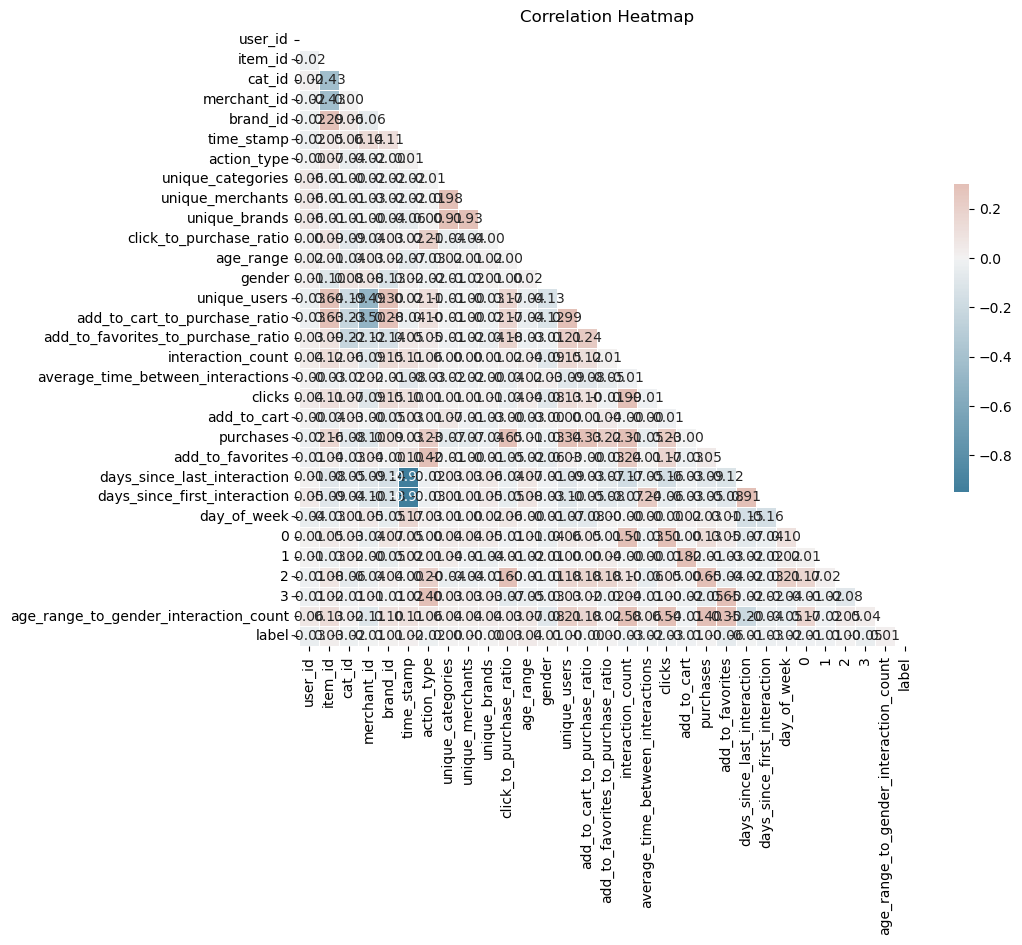

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [7]:
columns = np.array(df.columns)
columns

array(['user_id', 'item_id', 'cat_id', 'merchant_id', 'brand_id',
       'time_stamp', 'action_type', 'unique_categories',
       'unique_merchants', 'unique_brands', 'click_to_purchase_ratio',
       'age_range', 'gender', 'unique_users',
       'add_to_cart_to_purchase_ratio',
       'add_to_favorites_to_purchase_ratio', 'interaction_count',
       'average_time_between_interactions', 'clicks', 'add_to_cart',
       'purchases', 'add_to_favorites', 'days_since_last_interaction',
       'days_since_first_interaction', 'day_of_week', '0', '1', '2', '3',
       'age_range_to_gender_interaction_count', 'label'], dtype=object)

In [9]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
corr_matrix = X.corr().abs()
corr_matrix

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,unique_categories,unique_merchants,unique_brands,...,purchases,add_to_favorites,days_since_last_interaction,days_since_first_interaction,day_of_week,0,1,2,3,age_range_to_gender_interaction_count
user_id,1.000000,0.022769,0.021127,0.018535,0.017751,0.024143,0.004401,0.060044,0.056980,0.063150,...,0.022901,0.010803,0.011428,0.046949,0.039771,0.009285,0.005243,0.009400,0.009178,0.060876
item_id,0.022769,1.000000,0.427359,0.430840,0.287822,0.049595,0.071991,0.014862,0.006432,0.012236,...,0.161625,0.039988,0.082310,0.089588,0.032601,0.049744,0.029343,0.075861,0.022421,0.130519
cat_id,0.021127,0.427359,1.000000,0.002747,0.064594,0.058674,0.039722,0.003268,0.009272,0.012958,...,0.079507,0.029096,0.053531,0.036174,0.012887,0.030647,0.022661,0.062179,0.008084,0.020528
merchant_id,0.018535,0.430840,0.002747,1.000000,0.063384,0.136125,0.018569,0.023730,0.026179,0.002640,...,0.097360,0.042210,0.090474,0.101549,0.052754,0.037089,0.003070,0.043566,0.012706,0.105006
brand_id,0.017751,0.287822,0.064594,0.063384,1.000000,0.114052,0.001535,0.020564,0.021558,0.041521,...,0.090932,0.004967,0.144508,0.128572,0.049194,0.070682,0.047723,0.035277,0.006989,0.102342
time_stamp,0.024143,0.049595,0.058674,0.136125,0.114052,1.000000,0.008096,0.019821,0.023351,0.061664,...,0.028599,0.101373,0.949264,0.941601,0.166462,0.050492,0.022397,0.004638,0.016612,0.107662
action_type,0.004401,0.071991,0.039722,0.018569,0.001535,0.008096,1.000000,0.006192,0.005580,0.001159,...,0.225942,0.420666,0.022105,0.028993,0.026617,0.000992,0.007513,0.199099,0.398520,0.060518
unique_categories,0.060044,0.014862,0.003268,0.023730,0.020564,0.019821,0.006192,1.000000,0.984118,0.910244,...,0.070403,0.006477,0.026368,0.010094,0.005703,0.041786,0.039431,0.038033,0.029557,0.038941
unique_merchants,0.056980,0.006432,0.009272,0.026179,0.021558,0.023351,0.005580,0.984118,1.000000,0.925039,...,0.068238,0.004076,0.031337,0.013535,0.004543,0.042800,0.007964,0.036473,0.031849,0.040283
unique_brands,0.063150,0.012236,0.012958,0.002640,0.041521,0.061664,0.001159,0.910244,0.925039,1.000000,...,0.036478,0.009501,0.063655,0.054990,0.018195,0.045440,0.038309,0.012262,0.028828,0.044180


In [31]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy import stats

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.1)]
print(to_drop)
# Drop highly correlated features
cols_to_drop = set(to_drop).intersection(X.columns)
X = X.drop(cols_to_drop, axis=1)

# Perform feature selection using RFE
estimator = LogisticRegression(solver='lbfgs')
selector = RFECV(estimator, cv=5)
selector = selector.fit(X, y)

# Print selected features and their ranking
selected_features = X.columns[selector.support_]
print(selected_features)
print(selector.ranking_)

C:\Users\modis\AppData\Local\Temp\ipykernel_20544\2168588881.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

['cat_id', 'merchant_id', 'brand_id', 'time_stamp', 'unique_merchants', 'unique_brands', 'click_to_purchase_ratio', 'gender', 'unique_users', 'add_to_cart_to_purchase_ratio', 'add_to_favorites_to_purchase_ratio', 'interaction_count', 'clicks', 'purchases', 'add_to_favorites', 'days_since_last_interaction', 'days_since_first_interaction', 'day_of_week', '0', '1', '2', '3', 'age_range_to_gender_interaction_count']
Index(['age_range'], dtype='object')
[6 5 2 3 1 4 7]


C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
X

,user_id,item_id,action_type,unique_categories,age_range,average_time_between_interactions,add_to_cart
0,219316,472,0,1,4.0,0.000,0
1,69247,471,2,1,4.0,0.000,0
2,69247,471,0,1,4.0,0.000,0
3,216952,352,0,1,5.0,0.000,0
4,55440,432,0,1,5.0,0.000,0
...,...,...,...,...,...,...,...
8011,410000,334,0,1,2.0,2.125,0
8012,410000,334,0,1,2.0,2.125,0
8013,158668,459,0,1,0.0,0.000,0
8014,356791,453,0,1,0.0,0.000,0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import pandas as pd

from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size=0.2)
model = models.Sequential()
model.add(layers.Dense(256,activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1]-1,) ))        #label kept getting counted as a feature
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.1),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
41/41 [==============================] - 2s 14ms/step - loss: 81249.1094 - acc: 0.9033 - val_loss: 0.1842 - val_acc: 0.9548
Epoch 2/10
41/41 [==============================] - 0s 8ms/step - loss: 0.3067 - acc: 0.9481 - val_loss: 0.1843 - val_acc: 0.9548
Epoch 3/10
41/41 [==============================] - 0s 8ms/step - loss: 0.2137 - acc: 0.9493 - val_loss: 0.1842 - val_acc: 0.9548
Epoch 4/10
41/41 [==============================] - 0s 8ms/step - loss: 0.1991 - acc: 0.9499 - val_loss: 0.1845 - val_acc: 0.9548
Epoch 5/10
41/41 [==============================] - 0s 9ms/step - loss: 0.1985 - acc: 0.9499 - val_loss: 0.1847 - val_acc: 0.9548
Epoch 6/10
41/41 [==============================] - 0s 8ms/step - loss: 0.2085 - acc: 0.9491 - val_loss: 0.1843 - val_acc: 0.9548
Epoch 7/10
41/41 [==============================] - 0s 8ms/step - loss: 0.2005 - acc: 0.9491 - val_loss: 0.1843 - val_acc: 0.9548
Epoch 8/10
41/41 [==============================] - 0s 8ms/step - loss: 0.1989 - acc:

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


51/51 [==============================] - 0s 2ms/step - loss: 0.1946 - acc: 0.9514
Test Loss: 0.19457070529460907
Test Accuracy: 0.9513715505599976


51/51 [==============================] - 0s 2ms/step
Accuracy: 0.9513715505599976
AUC: 0.5
F1 score: 0.0
Recall: 0.0
Precision: 0.0


C:\Users\modis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


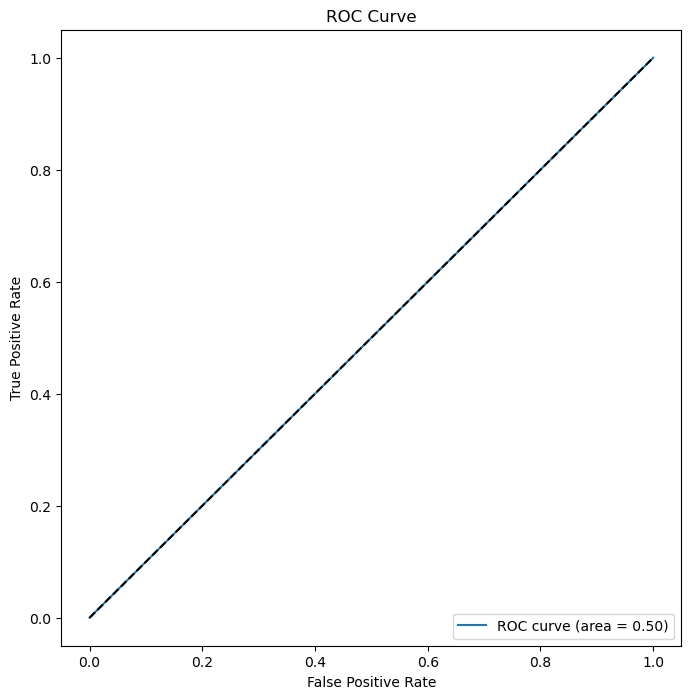

In [36]:
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate fpr, tpr, thresholds and auc for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate F1 score, recall and precision
f1 = f1_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())

# Print evaluation metrics
print('Accuracy:', accuracy)
print('AUC:', roc_auc)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Different Methods

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB


In [38]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['age_range'] = le.fit_transform(df['age_range'])
df['add_to_cart_to_purchase_ratio'] = le.fit_transform(df['add_to_cart_to_purchase_ratio'])

X_train, X_test, y_train, y_test = train_test_split(df[['gender', 'age_range', 'add_to_cart_to_purchase_ratio']], df['item_id'], test_size=0.2, random_state=42)

In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.38341645885286785


In [41]:
df['age_range']

0       3
1       3
2       3
3       4
4       4
       ..
8011    1
8012    1
8013    0
8014    0
8015    0
Name: age_range, Length: 8016, dtype: int64

In [ ]:
new_customer = {'gender': 'female', 'age_range': '2', 'purchase_history': 'high'}
new_customer['gender'] = le.transform([new_customer['gender']])[0]
new_customer['age_group'] = le.transform([new_customer['age_group']])[0]
new_customer['purchase_history'] = le.transform([new_customer['purchase_history']])[0]
recommendation = model.predict([list(new_customer.values())])[0]
print("Recommended product for the new customer:", recommendation)

In [42]:
#bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X is the input features and y is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_train)
print(accuracy_test)

0.4898627573300062
0.48192019950124687
